<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/LeetCodeMay_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# May 17th Find All Anagrams in a String
'''
Input 1:
s: "cbaebabacd" p: "abc"

Output 1:
[0, 6]

Explanation:
The substring with start index = 0 is "cba", which is an anagram of "abc".
The substring with start index = 6 is "bac", which is an anagram of "abc".

Input 2:
s: "abab" p: "ab"

Output 2:
[0, 1, 2]

Explanation:
The substring with start index = 0 is "ab", which is an anagram of "ab".
The substring with start index = 1 is "ba", which is an anagram of "ab".
The substring with start index = 2 is "ab", which is an anagram of "ab".
'''
# trial 1: TIme limit exceed

class Solution:
    def findAnagrams(self, s: str, p: str) -> List[int]:
        s_len, p_len = len(s), len(p)
        ret_arr = []
        dic = Counter(p) # not yet even using Counter
        
        for i in range(len(s)):
            if i + p_len < s_len + 1:
                if sorted(s[i:i+p_len]) == sorted(p):
                # if Counter(s[i:i+p_len]) == dic:  # not yet even using Counter
                    ret_arr.append(i)
            else:
                break
        return ret_arr


In [0]:
# May 17th. Phone solution , fk, always forgot. 120 ms 
''' Find all anagrams in a String
Maintain a count of each letter in a sliding windown in s, minus the counts of letter in p,
populate the dictionary with the intial counts, then slide along removing chars at the back and adding char at the front.
Add to result if the dictionary is empty (all values zero)

'''
from collections import defaultdict
class Solution(object):
  def findanagrams(self, s, p):
    len_s, len_p = len(s), len(p)
    freq = defaultdict(int)
    result = []

    if len_p > len_s:
      return result
    
    def update_freq(c, step):
      if not freq[c]:
        freq[c] = step
      else:
        freq[c] += step
      if freq[c] == 0:
        del freq[c]
    
    for c1, c2 in zip(p, s[:len_p]):
      update_freq(c1,-1)
      update_freq(c2,1)

    for i in range(len_s - len_p):
      if not freq:
        result.append(i)
      update_freq(s[i],-1)
      update_freq(s[i+ len_p],1)
    
    if not freq:
      result.append(len_s - len_p)

    return result 


test = Solution()
# s = "cbaebabacd" 
# p = "abc"
# [0, 6]

s = "abab" 
p = "ab"

print(test.findanagrams(s,p))

[0, 1, 2]


In [0]:
# 64 ms SOlution hash map ? 

class Solution:
    def findAnagrams(self, s: str, p: str) -> List[int]:
        if (l2 := len(s)) < (l1 := len(p)): return

        p_hash = sum(map(hash, p))
        s_hash = sum(hash(s[i]) for i in range(l1))
        
        if p_hash == s_hash:
            return [0] + list(i+1 for i in range(l2-l1) if p_hash==(s_hash:=s_hash-hash(s[i])+hash(s[i+l1])))
        else:
            return list(i+1 for i in range(l2-l1) if p_hash==(s_hash:=s_hash-hash(s[i])+hash(s[i+l1])))

# 68 ms
class Solution:
    def findAnagrams(self, s: str, p: str) -> List[int]:
        if (l2 := len(s)) < (l1 := len(p)): return

        p_hash = sum(map(hash, p))
        s_hash = sum(hash(s[i]) for i in range(l1))
        res = [0] if p_hash == s_hash else []
        
        for i in range(l2-l1): 
            s_hash = s_hash - hash(s[i]) + hash(s[i + l1])
            if s_hash == p_hash:
                res.append(i+1)
        
        return res

In [0]:
# 60 ms Solution 

class Solution:
    def findAnagrams(self, s: str, p: str) -> List[int]:
        p = "".join(sorted(p))
        l = len(p)
        ls = len(s)
        res = []
        # for i in range(len(s)):
        #     if s[i] not in p: continue
        #     if ls-i >= l and "".join(sorted(s[i:i+l])) == p: res.append(i)
        # return res
        i = l -1
        pre = False
        while i < ls:
            if pre and s[i] == s[i-l]:
                res.append(i-l+1)
                i += 1
            elif s[i] in p:
                if p == "".join(sorted(s[i-l+1:i+1])):
                    res.append(i-l+1)
                    pre = True
                else:
                    pre = False
                i += 1
            else:
                i += l
                pre = False
        return res

In [0]:
# May 18th , Apply the same method using in 17th. Slide window checking anagram
''' Permutation in String

Given two strings s1 and s2, write a function to return true if s2 contains the permutation of s1. 
In other words, one of the first string's permutations is the substring of the second string.

Input: s1 = "ab" s2 = "eidbaooo"
Output: True
Explanation: s2 contains one permutation of s1 ("ba").

Input:s1= "ab" s2 = "eidboaoo"
Output: False
'''
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        len_s1, len_s2 = len(s1), len(s2)
        freq = defaultdict(int)
        result = []

        if len_s1 > len_s2:
            return False

        def update_freq(c, step):
            if not freq[c]:
                freq[c] = step
            else:
                freq[c] += step
            if freq[c] == 0:
                del freq[c]

        for c1, c2 in zip(s1, s2[:len_s1]):
            update_freq(c1,-1)
            update_freq(c2,1)

        for i in range(len_s2 - len_s1):
            if not freq:
                result.append(i)
            update_freq(s2[i],-1)
            update_freq(s2[i+ len_s1],1)

        if not freq:
            result.append(len_s2 - len_s1)

        return False if not result else True


In [0]:
# May 18th. Fastest SOlution is 36ms
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        
        if len(s1)>len(s2):
            return False
        
        d1 = {}
        for l in s1:
            if l in d1:
                d1[l] += 1
            else:
                d1[l] = 1
    
        d2 = {}
        for l in s2[:len(s1)]:
            if l in d2:
                d2[l] += 1
            else:
                d2[l] = 1
                
        if d1 == d2:
            return True
        
        for i in range(len(s2)-len(s1)):
            v_out = s2[i]
            if d2[v_out] == 1:
                del d2[v_out]
            else:
                d2[v_out] -=1

            v_in = s2[i+len(s1)]
            if v_in in d2:
                d2[v_in] += 1
            else:
                d2[v_in] = 1
            if d1 == d2:
                return True
                
        return False
            

In [0]:
# 40 ms Submission
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        s1Len, s2Len = len(s1), len(s2)
        s1Hash, s2Hash = 0, 0
        if s1Len > s2Len:
            return False
        
        for i in range(s1Len):
            s1Hash, s2Hash = s1Hash + hash(s1[i]), s2Hash + hash(s2[i])
        if s1Hash == s2Hash:
            return True
        for i in range(s1Len, s2Len):
            s2Hash += hash(s2[i]) - hash(s2[i-s1Len])
            if s2Hash == s1Hash:
                return True
        return False
        

In [0]:
# May 19th Online Stock Span ## PHone solution 
'''
Write a class StockSpanner which collects daily price quotes for some stock, and returns the span of that stock's price for the current day.

The span of the stock's price today is defined as the maximum number of consecutive days (starting from today and going backwards) for which the price of the stock was less than or equal to today's price.

For example, if the price of a stock over the next 7 days were [100, 80, 60, 70, 60, 75, 85], then the stock spans would be [1, 1, 1, 2, 1, 4, 6].

Input: ["StockSpanner","next","next","next","next","next","next","next"], [[],[100],[80],[60],[70],[60],[75],[85]]
Output: [null,1,1,1,2,1,4,6]
Explanation: 
First, S = StockSpanner() is initialized.  Then:
S.next(100) is called and returns 1,
S.next(80) is called and returns 1,
S.next(60) is called and returns 1,
S.next(70) is called and returns 2,
S.next(60) is called and returns 1,
S.next(75) is called and returns 4,
S.next(85) is called and returns 6.

Note that (for example) S.next(75) returned 4, because the last 4 prices
(including today's price of 75) were less than or equal to today's price. '''

class StockSpanner:

    def __init__(self):
        self.mem = []
        
    def next(self, price: int) -> int:
        result = 1
     
        while self.mem and self.mem[-1][1] <= price:
            tmp , _ = self.mem.pop()
            result += tmp
       
        self.mem.append([result,price])
        return result
        

# Your StockSpanner object will be instantiated and called as such:
# obj = StockSpanner()
# param_1 = obj.next(price)

In [0]:
'''  DOUBLE LINKED LIST SOLUION
The idea is similar to the stack solution, but uses pointers instead of popping from the stack. 
Each node stores the price and the number of calls to the next method up to that node, as well as pointers to previous and next nodes. 
The algorithm works as follows:

1. Initialize the head node with price = None and ln = 0
2. On each call to next do:
  - Update the total number of calls to next (ln)
  - Create a new node with the given price and current ln
  - Create a pointer to head (curr)
  -  Move it to the first largest price before the current price
  - Unlink all nodes that are smaller than current price
  - Point the head to the new node
Return the current ln minus the ln of the largest previous element (or first element)

Analysis: If all numbers are in descending order, it takes O(1) time to get the current span and O(n) total calls to next, so O(n) total. 
If all numbers are in ascending order, it takes O(1) to delete previous, and O(1) to get current span, for O(n) total calls.
Worst case in space is when all numbers are in descending order, in which case it would require O(n) space to store the full list.

'''
class Node():
    def __init__(self, price, ln):
        self.price = price
        self.ln = ln
        self.prev = None
        self.next = None

class StockSpanner():

    def __init__(self):
        self.head = Node(None, 0)
        self.ln = 0
        
    def next(self, price: int) -> int:
        self.ln += 1
        
        new_node = Node(price, self.ln)
        curr = self.head

        while curr.price != None and curr.price <= price:
            curr = curr.prev
            
        new_node.prev = curr
        curr.next = new_node
        self.head = curr.next
        
        #self.print_list(self.head)
        
        return self.ln - curr.ln
    
    def print_list(self, head):
        while head:
            print(head.price, head.ln)
            head = head.prev


In [0]:
# Note here so that I can investigate more with Linked list 
class ListNode:
    def __init__(self, val=0, less=0, pre=None):
        self.val = val
        self.less = less
        self.pre = pre

class StockSpanner:
    def __init__(self):
        self.tail = ListNode(val=10 ** 6)

    def next(self, price):
        total, cur = 1, self.tail
        while cur and cur.val <= price:
            total += cur.less
            cur = cur.pre
        self.tail = ListNode(price, total, cur)        
        return total

In [0]:
# May 20th. 32ms submission
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    
    def kthSmallest(self, root: TreeNode, k: int) -> int:
        self.count = 0
        
        def kthSmallest_helper(node, k): 
            print(node.val)
            print(self.count)
            if node.left:
                val = kthSmallest_helper(node.left, k)
                if val!="NotHere":
                    return val
            self.count+=1
            if self.count==k:
                return node.val 
            if node.right==None:
                return "NotHere"
            return kthSmallest_helper(node.right, k)    
        
        return kthSmallest_helper(root, k)
      

In [0]:
# A function to find  
def KSmallestUsingMorris(root, k): 
      
    # Count to iterate over elements  
    # till we get the kth smallest number  
    count = 0
  
    ksmall = -9999999999 # store the Kth smallest  
    curr = root # to store the current node  
  
    while curr != None: 
          
        # Like Morris traversal if current does 
        # not have left child rather than  
        # printing as we did in inorder, we  
        # will just increment the count as the  
        # number will be in an increasing order  
        if curr.left == None: 
            count += 1
  
            # if count is equal to K then we  
            # found the kth smallest, so store  
            # it in ksmall  
            if count == k:  
                ksmall = curr.key  
  
            # go to current's right child  
            curr = curr.right 
        else: 
              
            # we create links to Inorder Successor  
            # and count using these links  
            pre = curr.left  
            while (pre.right != None and 
                   pre.right != curr):  
                pre = pre.right  
  
            # building links  
            if pre.right == None: 
                  
                # link made to Inorder Successor  
                pre.right = curr  
                curr = curr.left 
  
            # While breaking the links in so made  
            # temporary threaded tree we will check  
            # for the K smallest condition  
            else: 
                  
                # Revert the changes made in if part  
                # (break link from the Inorder Successor)  
                pre.right = None
  
                count += 1
  
                # If count is equal to K then we  
                # found the kth smallest and so  
                # store it in ksmall  
                if count == k: 
                    ksmall = curr.key  
          
                curr = curr.right 
    return ksmall # return the found value  

### May 21th  Count Square Submatrices with All Ones
Given a  **m * n matrix** of ones and zeros, return how many square submatrices have all ones.
```
#  
Input1: matrix =
[
  [0,1,1,1], 
  [1,1,1,1],
  [0,1,1,1]
]
Output1: 15
Explanation: 
There are 10 squares of side 1. There are 4 squares of side 2. There is  1 square of side 3. Total number of squares = 10 + 4 + 1 = 15.

Input2: matrix = 
[
  [1,0,1],
  [1,1,0],
  [1,1,0]
]
Output2: 7
 
There are 6 squares of side 1.  There is 1 square of side 2. Total number of squares = 6 + 1 = 7.
```




In [0]:
'''Explanation  https://leetcode.com/explore/featured/card/may-leetcoding-challenge/536/week-3-may-15th-may-21st/3336/discuss/518072/Python-O(-m*n-)-sol-by-DP-93+-with-Hint-and-Demo
dp[i][j] means the size of biggest square with A[i][j] as bottom-right corner.
dp[i][j] also means the number of squares with A[i][j] as bottom-right corner.

If A[i][j] == 0, no possible square.
If A[i][j] == 1,
we compare the size of square dp[i-1][j-1], dp[i-1][j] and dp[i][j-1].
min(dp[i-1][j-1], dp[i-1][j], dp[i][j-1]) + 1 is the maximum size of square that we can find.


Complexity
Time O(MN)
Space O(1)'''
# May 21 fastest solution 
class Solution:
    def countSquares(self, matrix: List[List[int]]) -> int:
        m,n=len(matrix),len(matrix[0])
        for i in range(1,m):
            for j in range(1,n):
                if matrix[i][j] and matrix[i][j-1] and matrix[i-1][j-1]:
                    k=min(matrix[i-1][j],matrix[i][j-1])
                    matrix[i][j]=k+1 if matrix[i-k][j-k] else k
                    
        return sum(sum(row) for row in matrix)

#### Phone solution the same as the one above
class Solution:
    def countSquares(self, matrix: List[List[int]]) -> int:
        x_len = len(matrix[0])
        y_len = len(matrix)
        
        for y in range(1,y_len):
            for x in range(1,x_len):
                matrix[y][x] *= 1 + min(matrix[y-1][x],matrix[y][x-1],matrix[y-1][x-1])
                
        return sum(map(sum,matrix))

  

In [0]:
# May 22th , my solution 32ms
'''Sort Characters By Frequency
Given a string, sort it in decreasing order based on the frequency of characters.
Input:
"tree"

Output:
"eert"

'e' appears twice while 'r' and 't' both appear once.
So 'e' must appear before both 'r' and 't'. Therefore "eetr" is also a valid answer.'''

class Solution:
    def frequencySort(self, s: str) -> str:
        s_dic = sorted(Counter(s).items(), key=operator.itemgetter(1),reverse=True)
        ret_str = ''
        
        for char,freq in s_dic:
            ret_str += char * freq
        
        return ret_str

# fastest solution 32ms ( use Counter)

import collections 
import heapq

class Solution:
    def frequencySort(self, s: str) -> str:
        counterMap = collections.Counter(s)
        res = ''
        hq = []
        for char, freq in counterMap.items():
            heapq.heappush(hq, (-freq, char))

        while hq:
            freq, char = heapq.heappop(hq)
            res += -freq*char
            
        return res


# 28ms Solution , use lambda func
class Solution:
    def frequencySort(self, s: str) -> str:
        a = Counter(s)
        return "".join(cr*c for cr, c in sorted(a.items(), key=lambda x:x[1], reverse=True))      

## Interval List Intersections 

https://leetcode.com/explore/challenge/card/may-leetcoding-challenge/537/week-4-may-22nd-may-28th/3338/
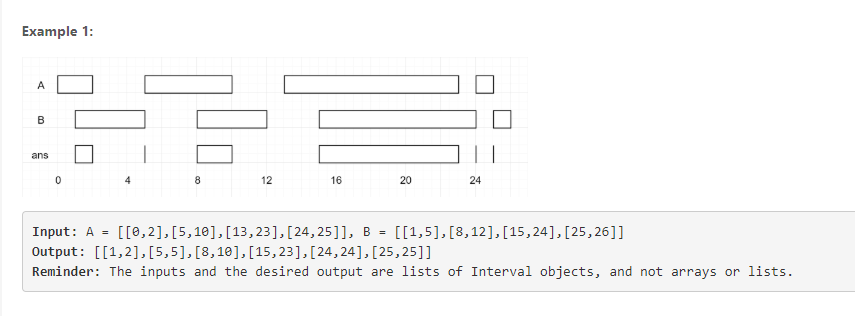

In [0]:
# May 23th, phone solution 
'''Input: A = [[0,2],[5,10],[13,23],[24,25]], B = [[1,5],[8,12],[15,24],[25,26]]
  Output: [[1,2],[5,5],[8,10],[15,23],[24,24],[25,25]]
Reminder: The inputs and the desired output are lists of Interval objects, and not arrays or lists.
 
Note:
0 <= A.length < 1000
0 <= B.length < 1000
0 <= A[i].start, A[i].end, B[i].start, B[i].end < 10^9
'''
class Solution:
    def intervalIntersection(self, A: List[List[int]], B: List[List[int]]) -> List[List[int]]:
        ret = []
        i, j = 0, 0
        
        while i < len(A) and j < len(B):
            last_start = max(A[i][0], B[j][0])
            first_end = min(A[i][1], B[j][1])
            
            #Overlap
            if last_start <= first_end:
                ret.append([last_start, first_end]) # no overlap if max start > first end 
            
            if A[i][1] > B[j][1]: # move past the one that ends first 
                j += 1
            else:
                i += 1
                
        return ret 

In [0]:
# 132 ms solution 
class Solution:
    def intervalIntersection(self, A: List[List[int]], B: List[List[int]]) -> List[List[int]]:
        res = []
        a_i = 0
        b_i = 0

        while a_i < len(A) and b_i < len(B):
            start_a, end_a = A[a_i]
            start_b, end_b = B[b_i]

            if end_a < start_b:
                a_i += 1
            elif end_b < start_a:
                b_i += 1
            else:
                if end_a <= end_b:
                    a_i += 1
                else:
                    b_i += 1
                res.append([max(start_a, start_b), min(end_a, end_b)])
        return res

In [0]:
from collections import deque

class Solution:
    
    def intervalIntersection(self, A: List[List[int]], B: List[List[int]]) -> List[List[int]]:
        if not A or not B:
            return []
        
        a_intervals = deque(A)
        b_intervals = deque(B)
        
        intersections = []
        
        a = a_intervals.popleft()
        b = b_intervals.popleft()
        
        while a and b:
            a_start, a_end = a[0], a[1]
            b_start, b_end = b[0], b[1]
            
            max_start = max(a_start, b_start)
            min_end = min(a_end, b_end)
        
            if max_start <= min_end:
                intersections.append([max_start, min_end])
            
            '''pop the one with the min end'''
            if a_end < b_end:
                if not a_intervals:
                    break
                a = a_intervals.popleft()
            else:
                if not b_intervals:
                    break
                b = b_intervals.popleft()
                
        return intersections


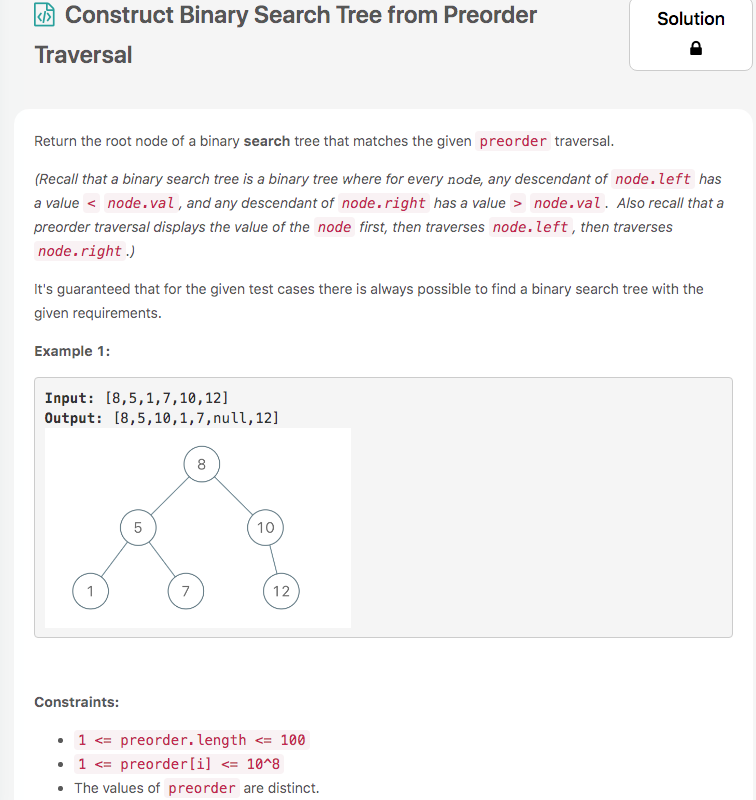

In [0]:
# May 24th , Geek Solution, need to understand more the Algo
''' Construct Binary Search Tree from Preorder Traversal
source: https://www.geeksforgeeks.org/construct-bst-from-given-preorder-traversal-set-2/
'''
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def bstFromPreorder(self, preorder: List[int]) -> TreeNode:
        root = TreeNode(preorder[0])
        size = len(preorder)
        stack = []
        stack.append(root)
        i = 1
        while (i < size):
            temp = None
            
            while (len(stack) > 0 and preorder[i] > stack[-1].val):  
                temp = stack.pop() 
              
            if (temp != None):  
                temp.right = TreeNode(preorder[i]) 
                stack.append(temp.right) 
            else : 
                temp = stack[-1] 
                temp.left = TreeNode(preorder[i]) 
                stack.append(temp.left) 
            i = i + 1
          
        return root 



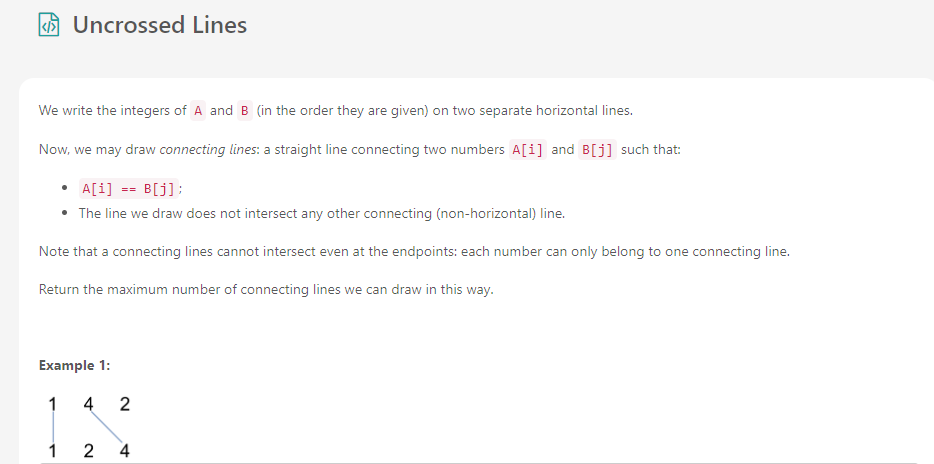`''''''`

In [0]:
''' May 25th 2020
https://leetcode.com/explore/challenge/card/may-leetcoding-challenge/537/week-4-may-22nd-may-28th/3340/
Input: A = [1,4,2], B = [1,2,4]
Output: 2
Explanation: We can draw 2 uncrossed lines as in the diagram.
We cannot draw 3 uncrossed lines, because the line from A[1]=4 to B[2]=4 will intersect the line from A[2]=2 to B[1]=2.
Example 2:

Input: A = [2,5,1,2,5], B = [10,5,2,1,5,2]
Output: 3
Example 3:

Input: A = [1,3,7,1,7,5], B = [1,9,2,5,1]
Output: 2
'''
# 1. 84 ms
class Solution:
    def maxUncrossedLines(self, A: List[int], B: List[int]) -> int:
        nums = set(A) & set(B)
        f = lambda x: x in nums
        A, B = list(filter(f, A)), list(filter(f, B))
        a_, b_ = len(A), len(B)
		
		# add one more zero in both row and column avoid boundary condition
        dp = [[0]*(b_+1) for _ in range(a_+1)]
        for i in range(1, 1 + a_):
            for j in range(1, 1+ b_):
                if A[i-1] == B[j-1]:
                    dp[i][j] = dp[i-1][j-1] + 1
                else:
                    dp[i][j] = max(dp[i-1][j], dp[i][j-1])
        return dp[-1][-1]


# 2. 68 ms 
class Solution:
    def maxUncrossedLines(self, A: List[int], B: List[int]) -> int:
        s = set(A) & set(B)
        A = [a for a in A if a in s]
        B = [b for b in B if b in s]
        m, n = len(A), len(B)
        if m < n:
            A, B, m, n = B, A, n, m
            
        dp = [0]*(m+1)                      # dp[i] in loop j: check up to A[i], B[j] 
        for j in range(n):                  # B[0]..B[j]
            new_dp = dp[:]
            for i in range(m):              # A[0]..A[i]
                if A[i] == B[j]:
                    new_dp[i+1] = dp[i] + 1 # add a new line
                else:
                    new_dp[i+1] = max(dp[i+1], new_dp[i])   # choose the best strategy
            dp = new_dp
            
        return dp[-1]


# 3. 72 ms , bisect ???

from bisect import bisect_left
class Solution:
    def maxUncrossedLines(self, A: List[int], B: List[int]) -> int:
        n, m = len(A), len(B)
        l = [[i, j] for i in range(n) for j in range(m) if A[i] == B[j]]
        v = []
        for _, b in sorted(l, key=lambda e: [e[0], -e[1]]):
            p = bisect_left(v, b)
            if p == len(v):
                v.append(b)
            else:
                v[p] = b
        return len(v)

In [0]:
# Phone solution , Using Dynamic Programming

class Solution:
    def maxUncrossedLines(self, A: List[int], B: List[int]) -> int:
        # to make sure len of B is smaller than A
        if len(A) < len(B):
            A, B = B, A
        max_uncrossed = [0] * (len(B) + 1)
        
        for i in range(len(A)):
            new_max_uncrossed = [0]
            for j in range(len(B)):
                new_max_uncrossed.append(max(max_uncrossed[j] + int(A[i]==B[j]),
                                            max_uncrossed[j+1],new_max_uncrossed[-1]))
            
            max_uncrossed = new_max_uncrossed
                
        return max_uncrossed[-1]
        

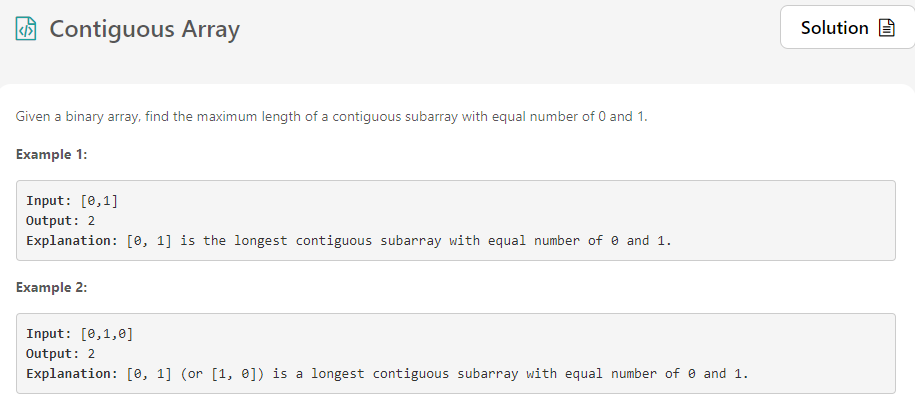

In [0]:
# May 26 Contiguous Array
class Solution:
    def findMaxLength(self, nums: List[int]) -> int:
        hash_map = {}   
        curr_sum = 0 
        max_len = 0 
        ending_index = -1 
        n = len(nums)
        for i in range (0, n):
            if(nums[i] == 0):
                nums[i] = -1 
            else:
                nums[i] = 1 
    
        # Traverse through the given array  
        for i in range (0, n):
            # Add current element to sum  
            curr_sum = curr_sum + nums[i]  

            # To handle sum=0 at last index  
            if (curr_sum == 0):  
                max_len = i + 1 
                ending_index = i  

            # If this sum is seen before,  
            if curr_sum in hash_map: 
                if max_len < i - hash_map[curr_sum]:
                    max_len = i - hash_map[curr_sum] 
                    ending_index = i 
            else:  
              # else put this sum in dictionary  
              hash_map[curr_sum] = i   

        for i in range (0, n):  
            if(nums[i] == -1):  
                nums[i] = 0 
            else:  
                nums[i] = 1 

        return max_len 
           

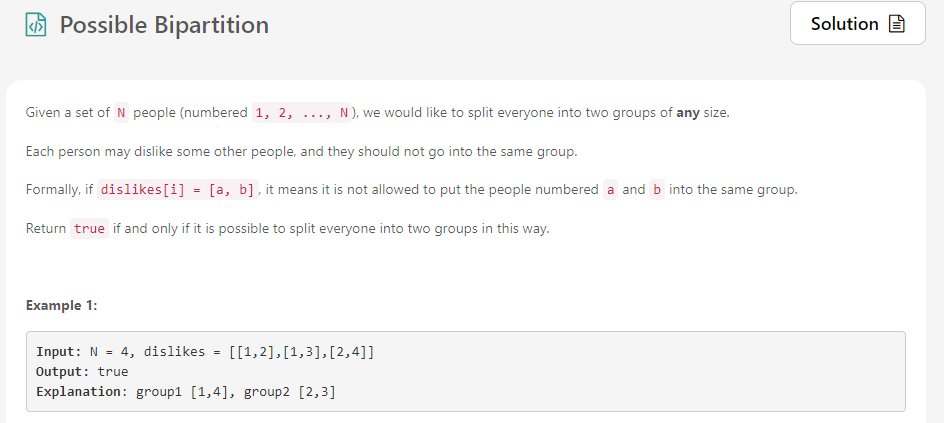

In [0]:
# May 27. Possible Bipartition
'''Example 1:
Input: N = 4, dislikes = [[1,2],[1,3],[2,4]]
Output: true
Explanation: group1 [1,4], group2 [2,3]

Example 2:
Input: N = 3, dislikes = [[1,2],[1,3],[2,3]]
Output: false

Example 3:
Input: N = 5, dislikes = [[1,2],[2,3],[3,4],[4,5],[1,5]]
Output: false'''

# PHone solution 
class Solution:
    def possibleBipartition(self, N: int, dislikes: List[List[int]]) -> bool:
        dislike = defaultdict(set)
        for i in dislikes:
            dislike[i[0]].add(i[1])
            dislike[i[1]].add(i[0])
        print(dislike)
        groupa, groupb = set(), set() # 2 group of ppl
        
        for i in range(1,N+1):
            if i in groupa or i in groupb:
                continue # already place this person in a group
            to_add = {i}
            
            while to_add:
                print(i, to_add)
                print(groupa, groupb)
                groupa |= to_add # put to_add to group A
                
                disliked = set() # ppl disliked by the ppl in to_add
                for num in to_add:
                    disliked |= dislike[num]
                if disliked & groupa:
                    return False # somebody dislikes sb else in group A
                
                disliked -= groupb # remove ppl already in group B
                to_add = disliked
                groupa, groupb = groupb, groupa

        
        return True
            
            

In [0]:
# 700 ms
class Solution:
    def possibleBipartition(self, N: int, dislikes: List[List[int]]) -> bool:
        colors, graph = [0]*(N+1), collections.defaultdict(list)
        for left, right in dislikes:
            graph[left].append(right)
            graph[right].append(left)
        for idx, n in enumerate(colors):
            if idx > 0 and n == 0 and not self.DFS(idx, colors, graph, 1):
                return False
        return True
    
    def DFS(self, idx, colors, graph, c):
        colors[idx] = c
        for nxt in graph[idx]:
            if colors[nxt] == c or colors[nxt] == 0 and not self.DFS(nxt, colors, graph, -c):
                return False
        return True

In [0]:
# 716 ms
class Solution:
    def possibleBipartition(self, N: int, dislikes: List[List[int]]) -> bool:
        
        graph = collections.defaultdict(list)
        for pair in dislikes:
            u, v = pair[0]-1, pair[1] - 1
            graph[u].append(v)
            graph[v].append(u)
        
        
        color = [0] * N   
        for i in range(N):
            if color[i] == 0 and not self.dfs(graph, color, i, 1):
                return False
        return True
            
            
        #     if color[i] != 0 : continue
        #     q = collections.deque()
        #     q.append(i)
        #     color[i] = 1
        #     while q:
        #         node = q.popleft()
        #         for neigh in graph[node]:
        #             if color[neigh] != 0:
        #                 if color[node] == color[neigh]:
        #                     return False
        #             else:
        #                 color[neigh] = -color[node]
        #                 q.append(neigh)
        # return True        
            
    def dfs(self, graph, color, node, col):
        color[node] = col
        for neigh in graph[node]:
            if color[neigh] == col:
                return False
            if color[neigh] == 0 and not self.dfs(graph, color, neigh, -col):
                return False
        return True            


In [0]:
# May 28. counting bits < need to understand how bit transform. 

class Solution:
    def countBits(self, num: int) -> List[int]:
        dp = [0] * (num + 1)
        for i in range(1, num + 1):
            dp[i] = dp[i - (i & -i)] + 1
        return dp

        
# phone solution dynamic Programming
class Solution:
    def countBits(self, num: int) -> List[int]:
        ret = [0]
        for i in range(1, num + 1):
            ret.append(1 + ret[i & (i-1)])
        return ret

In [0]:
# May 29 Course Schedule < need to understand Topological Sort > 
'''
https://www.khanacademy.org/computing/computer-science/algorithms/graph-representation/a/representing-graphs

- Topological sort. Find nodes with no dependencis. 
- Remove outgoing edges from each such node. Repeat until no node has no dependencies. 
# Time - O(m + n)
# Space - O(m + n)
'''
# phone solution

class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        # key is course, value is number of  prerequisite courses
        Nb_of_pre_courses = defaultdict(int)
        # key is a course, value is list of courses that depend on course
        Pre_list = defaultdict(list)
        
        for after, before in prerequisites: # a way to iterate list of pairs
            Nb_of_pre_courses[after] += 1
            Pre_list[before].append(after)
        # courses can be taken
        Stack = set(i for i in range(numCourses)) - set(Nb_of_pre_courses.keys())
        
        while Stack:
            
            course = Stack.pop() # take any course with no prerequisites 
            numCourses -= 1 # decrement count of remaning courses to be taken

            for dependent in Pre_list[course]:
                Nb_of_pre_courses[dependent] -= 1 # decrement count of dependencies
                if Nb_of_pre_courses[dependent] == 0: # no more prerequisites
                    Stack.add(dependent)
        
        return numCourses == 0


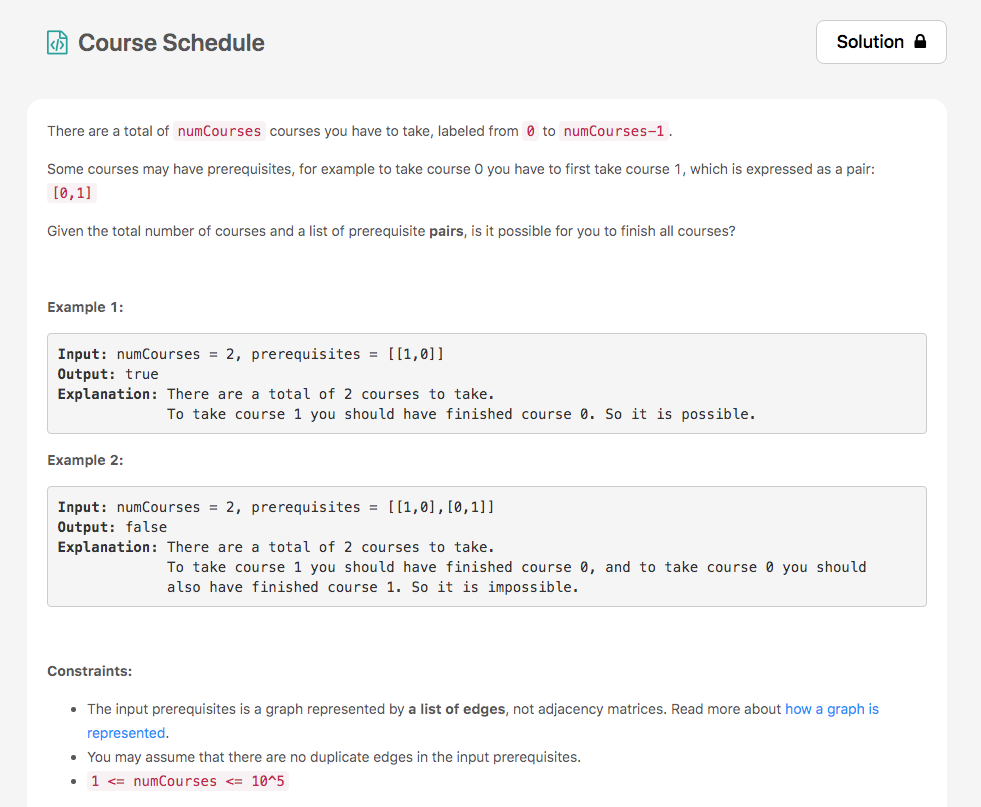

In [0]:
# 76 ms Solution
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        
        graph = collections.defaultdict(list)
        deg = [0]*numCourses
        
        for i, j in prerequisites:
            graph[j].append(i)
            deg[i] += 1
        
        queue = collections.deque([i for i, v in enumerate(deg) if v==0])
        
        while queue:
            cur_v = queue.popleft()
            for neighbor in graph[cur_v]:
                deg[neighbor] -= 1
                if deg[neighbor]==0:
                    queue.append(neighbor)
 
        return not sum(deg)
        

In [0]:
# 80 ms DFS

class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        graph = [[] for _ in range(numCourses)]
        visit = [0 for _ in range(numCourses)]

        for x, y in prerequisites:
            graph[x].append(y)

        for i in range(numCourses):
            if not self.dfs(i, visit, graph):
                return False

        return True

    def dfs(self, i, visit, graph):
        if visit[i] == -1:
            return False
        if visit[i] == 1:
            return True

        visit[i] = -1
        for j in graph[i]:
            if not self.dfs(j, visit, graph):
                return False
        visit[i] = 1

        return True

In [0]:
# 85 ms
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        ''' DFS '''      
        def dfs(adj, u):
            exploring[u] = True
            
            for n in adj[u]:
                if finished[n] == True:
                    continue
                if exploring[n] == True:
                    return True
                else:
                    if dfs(adj, n) == True:
                        return True
            finished[u] = True
            return False
        
        
        def hasCycle(adj):
        ''' CHECK CYCLE '''      
            for idx in range(numCourses):
                if finished[idx] == False:
                    if dfs(adj, idx) == True:
                        return True
            return False
        
        
        self.cycle = False
        adj = [[] for _ in range(numCourses)]
        exploring = [False] * numCourses
        finished = [False] * numCourses
        for edge in prerequisites:
            adj[edge[0]].append(edge[1])
        
        return not hasCycle(adj)

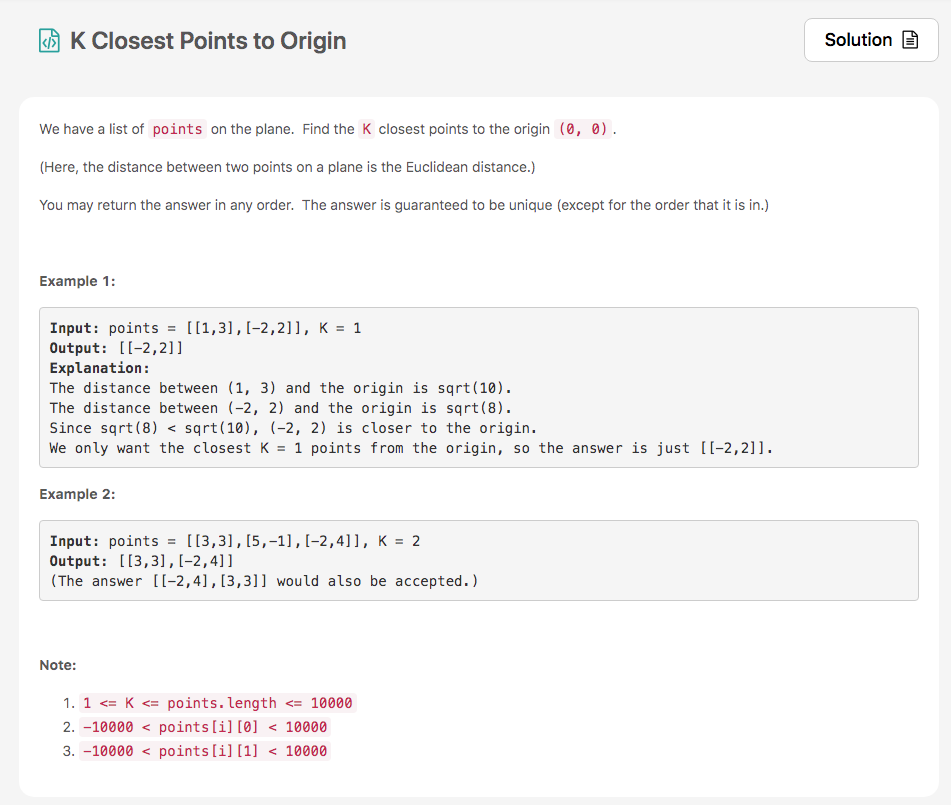

In [0]:
''' May leet code 30th K Closet Points to Origin
Example 1:
Input: points = [[1,3],[-2,2]], K = 1
Output: [[-2,2]]
Explanation: 
The distance between (1, 3) and the origin is sqrt(10).
The distance between (-2, 2) and the origin is sqrt(8).
Since sqrt(8) < sqrt(10), (-2, 2) is closer to the origin.
We only want the closest K = 1 points from the origin, so the answer is just [[-2,2]].

Example 2:
Input: points = [[3,3],[5,-1],[-2,4]], K = 2
Output: [[3,3],[-2,4]]
(The answer [[-2,4],[3,3]] would also be accepted.)

'''
# My answer 676 ms, beat 89% 
class Solution:
    def kClosest(self, points: List[List[int]], K: int) -> List[List[int]]:
        # making a temporary list to store to distance**2
        temp = [ points[i][0]**2 + points[i][1]**2 for i in range(len(points))]

        # enumerate(temp) give a list contain tuples of (index,value)
        # sorting and get the origional index
        sorted_index = [k[0] for k in sorted(enumerate(temp),key = lambda x:x[1])]
            
        return [points[index] for index in sorted_index[:K]] #get only K pairs out. 

In [0]:
# Fastest solutions 606ms
class Solution:
    def kClosest(self, points: List[List[int]], K: int) -> List[List[int]]:
        points.sort(key = lambda x: x[0] * x[0] + x[1] * x[1]) # the build in sort functions can take lambda key 
        return points[:K]

# Others
class Solution:
    def kClosest(self, points: List[List[int]], K: int) -> List[List[int]]:
        def f(point): # can be replaced as lambda function as above
            return  point[0]*point[0]+ point[1]*point[1]
        return sorted(points, key=f)[:K]

# lambda
class Solution:
    def kClosest(self, points: List[List[int]], K: int) -> List[List[int]]:
        points.sort(key=lambda P: P[0] * P[0] + P[1] * P[1])
        return points[:K]


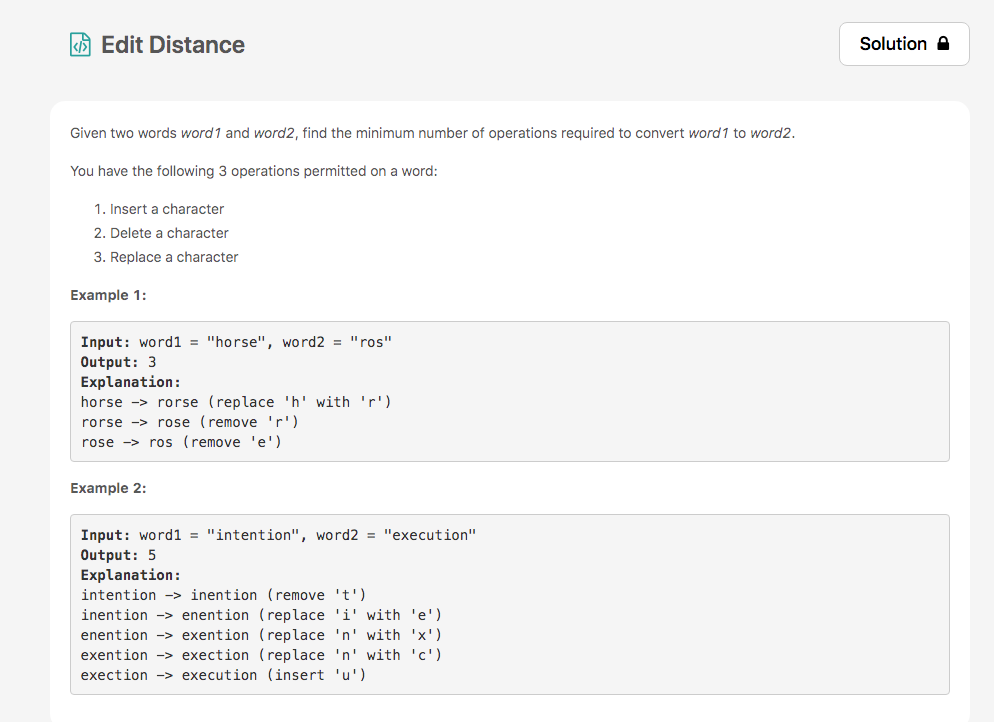

In [0]:
#### Last day of May, GEEK SOlution 
''' EDIT DISTANCE DP
Ex1:
Input: word1 = "horse", word2 = "ros"
Output: 3
Explanation: 
horse -> rorse (replace 'h' with 'r')
rorse -> rose (remove 'r')
rose -> ros (remove 'e')

Ex2:
Input: word1 = "intention", word2 = "execution"
Output: 5
Explanation: 
intention -> inention (remove 't')
inention -> enention (replace 'i' with 'e')
enention -> exention (replace 'n' with 'x')
exention -> exection (replace 'n' with 'c')
exection -> execution (insert 'u')
'''
# Check the geek website to understand more about SubProblems Property in Dynamic Programming. 
# Optimal Substructure Property in DP-2
class Solution:
    def minDistance(self, word1: str, word2: str) -> int:
        l1,l2 = len(word1),len(word2)
        def editDP( str1, str2, len1, len2):
            dp = [[0 for x in range(len2+1)] for x in range(len1+1)]  ### A Table to store the results 
            
            for i in range(len1 + 1):
                for j in range(len2 +1):
                    
                    if i == 0:
                        dp[i][j] = j
                    elif j == 0:
                        dp[i][j] = i
                    elif str1[i-1] == str2[j-1]:
                        dp[i][j] =  dp[i-1][j-1]
                    
                    else:
                         dp[i][j] = 1 + min(dp[i][j-1],dp[i-1][j],dp[i-1][j-1])
                            
            return dp[len1][len2]
        return editDP(word1,word2, l1,l2)



# fastest solution 40ms, NOT YET understand 
from collections import deque

class Solution:  
    def minDistance(self, word1: str, word2: str) -> int:
        
        visited = set()
        q = deque([(word1, word2, 0)])
        
        while q:
            w1, w2, dist = q.popleft()
            
            if (w1, w2) not in visited:
                visited.add((w1, w2))

                if w1 == w2:
                    return dist

                while w1 and w2 and w1[0] == w2[0]:
                    w1 = w1[1:]
                    w2 = w2[1:]

                dist += 1
                q.extend([(
                    w1[1:], w2[1:], dist), 
                    (w1, w2[1:], dist), 
                    (w1[1:], w2, dist)])